--2022-09-15 17:07:20--  https://images.fineartamerica.com/images-medium-large/golf-ball-in-the-tall-green-grass-on-a-resort-course-elite-image-photography-by-chad-mcdermott.jpg
Resolving images.fineartamerica.com (images.fineartamerica.com)... 18.66.248.125, 18.66.248.91, 18.66.248.107, ...
Connecting to images.fineartamerica.com (images.fineartamerica.com)|18.66.248.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304470 (297K) [image/jpeg]
Saving to: ‘golf.jpg’

golf.jpg            100%[===================>] 297,33K  1,06MB/s    in 0,3s    

2022-09-15 17:07:21 (1,06 MB/s) - ‘golf.jpg’ saved [304470/304470]



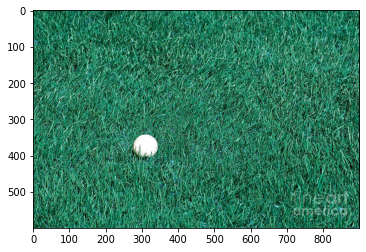

In [1]:
%matplotlib inline
import cv2 # das ist opencv.
import numpy as np # allgemeine lib fuer daten
from matplotlib import pyplot as plt

# erstmal ein bild runterladen
!wget https://images.fineartamerica.com/images-medium-large/golf-ball-in-the-tall-green-grass-on-a-resort-course-elite-image-photography-by-chad-mcdermott.jpg -O golf.jpg

img = cv2.imread('golf.jpg')

# und direkt hier anzeigen
plt.imshow(img)

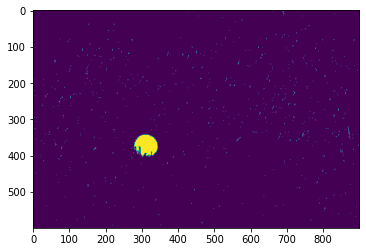

In [2]:
# das bild in einen anderen farbraum übersetzen, indem ähnliche farben
# benachbart sind. 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# jetzt können wir die farben filtern und nur weisse bereich darstellen lassen
# wenn du dir bei wiki oder so mal HSV anschaust, dann definieren wir hier einen
# zylinder in der mitte des farbspektrum, der alle weisstöne umfasst.
# cf. https://en.wikipedia.org/wiki/HSL_and_HSV
lower = np.array([0, 0, 0]) # weiss
upper = np.array([255, 20, 255]) 

# und stellen nur diese dar
mask = cv2.inRange(hsv, lower, upper) 
plt.imshow(mask)

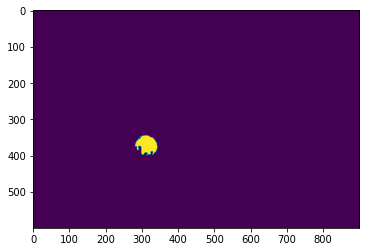

In [3]:
# wie man sehen kann sind hier noch ein paar flecken im bild, die nicht zum ball
# gehören. diese filtern wir jetzt zum beispiel durch closing 
# (siehe https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html)

# zuerst bestimmen wir dazu einen filter....
kernel = np.ones((4,4),np.uint8) # 4x4 matrix aus einsen.
# ... der über das bild gestreift wird um die punkte zu löschen.
closed_img = cv2.erode(mask,kernel,iterations = 1)

# und lassen uns das wieder anzeigen.
plt.imshow(closed_img)

In [4]:
# als nächstes kann man jetzt feststellen, welche pixel im bild noch farben haben
print(closed_img > 0)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [5]:
# und jetzt können wir uns diese koordinaten anzeigen lassen.
# ACHTUNG! numpy und opencv nutzen unterschiedliche koordinaten. daher muss das
# bild hier einmal transponiert werden.
colored_positions = np.where(closed_img.T > 0)
print(colored_positions)

(array([281, 281, 281, ..., 341, 341, 341]), array([370, 371, 372, ..., 378, 379, 380]))


[281 345]
[341 399]
Der Mittelpunkt des Balles befindet sich bei (x = 311, y = 372)


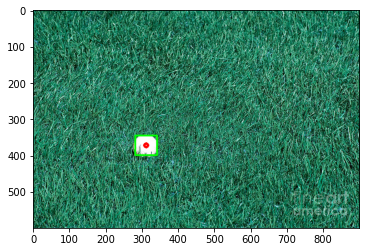

In [6]:
# mit der min/max dieser punkte haben wir dann eine box, die den ball beschreibt:
min_pos = np.min(np.array(colored_positions), 1)
max_pos = np.max(np.array(colored_positions), 1)

# die koordniaten anzeigen
print(min_pos)
print(max_pos)

# und den mittelpunkt bestimmen.
center_x = (min_pos[0] + max_pos[0]) // 2 # // ist teilen mit ganzzahligem ergebnis.
center_y = (min_pos[1] + max_pos[1]) // 2


# diese koordinaten lassen wir uns jetzt anzeigen.
# wir kopieren jetzt das originale bild, um dari ein bisschen rumzumalen
output_img = img.copy()
cv2.rectangle(output_img, tuple(max_pos), tuple(min_pos), (0,255,0),3)
cv2.circle(output_img, (center_x, center_y), radius=5, color=(255, 0, 0), thickness=5)
plt.imshow(output_img)

print('Der Mittelpunkt des Balles befindet sich bei (x = %d, y = %d)'%(center_x, center_y))